## 13. 이미지 변형4 (이진화)

In [2]:
# threshold

import cv2
img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('img', img)
cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

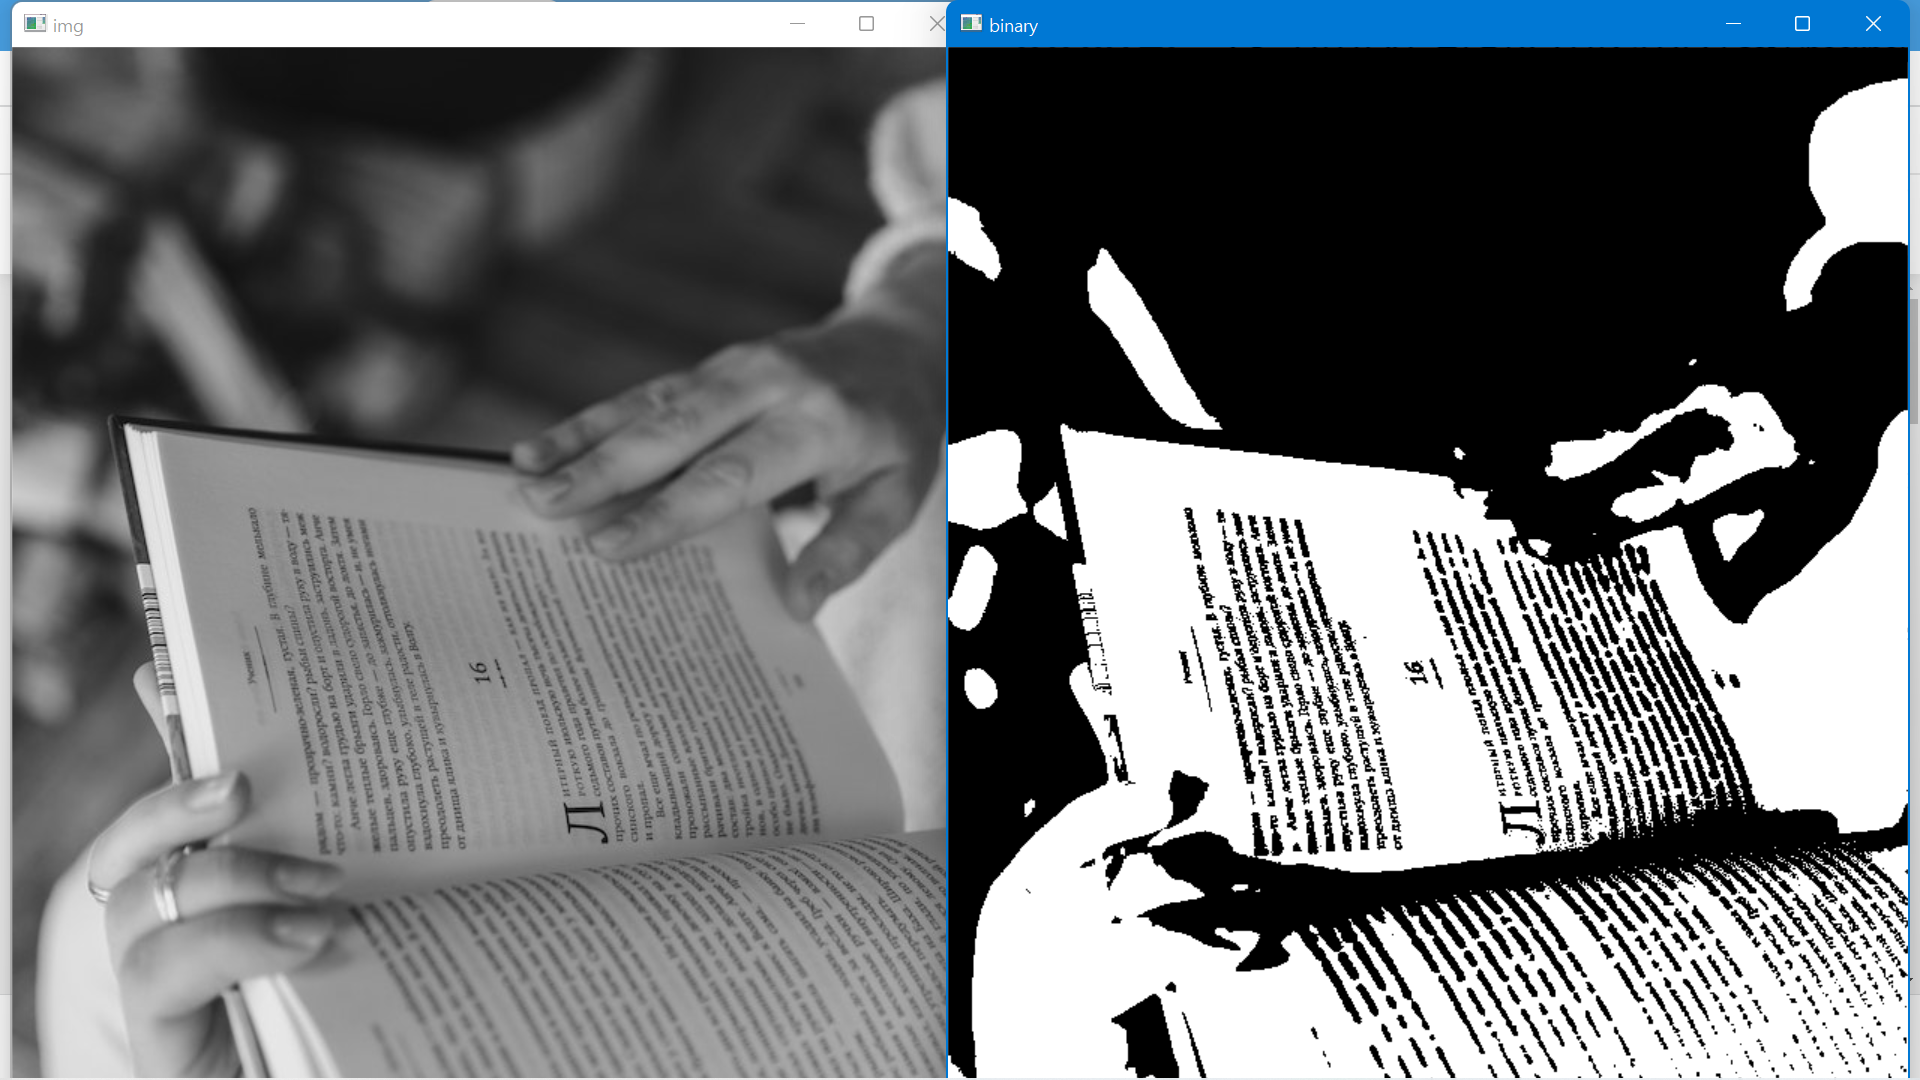

In [6]:
# Trackbar (값 변화에 따른 변형 확인)

import cv2

def empty(pos):
    # print(pos)
    pass

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

name = 'Trackbar'
cv2.namedWindow(name)

cv2.createTrackbar('threshold', name, 127, 255, empty) # bar 이름, 창의 이름, 초기값, 최대값, 이벤트 처리

while True:
    thresh = cv2.getTrackbarPos('threshold', name) # bar 이름, 창의 이름
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    
    if not ret:
        break
        
    cv2.imshow(name, binary)
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'Trackbar' in function 'cvGetTrackbarPos'


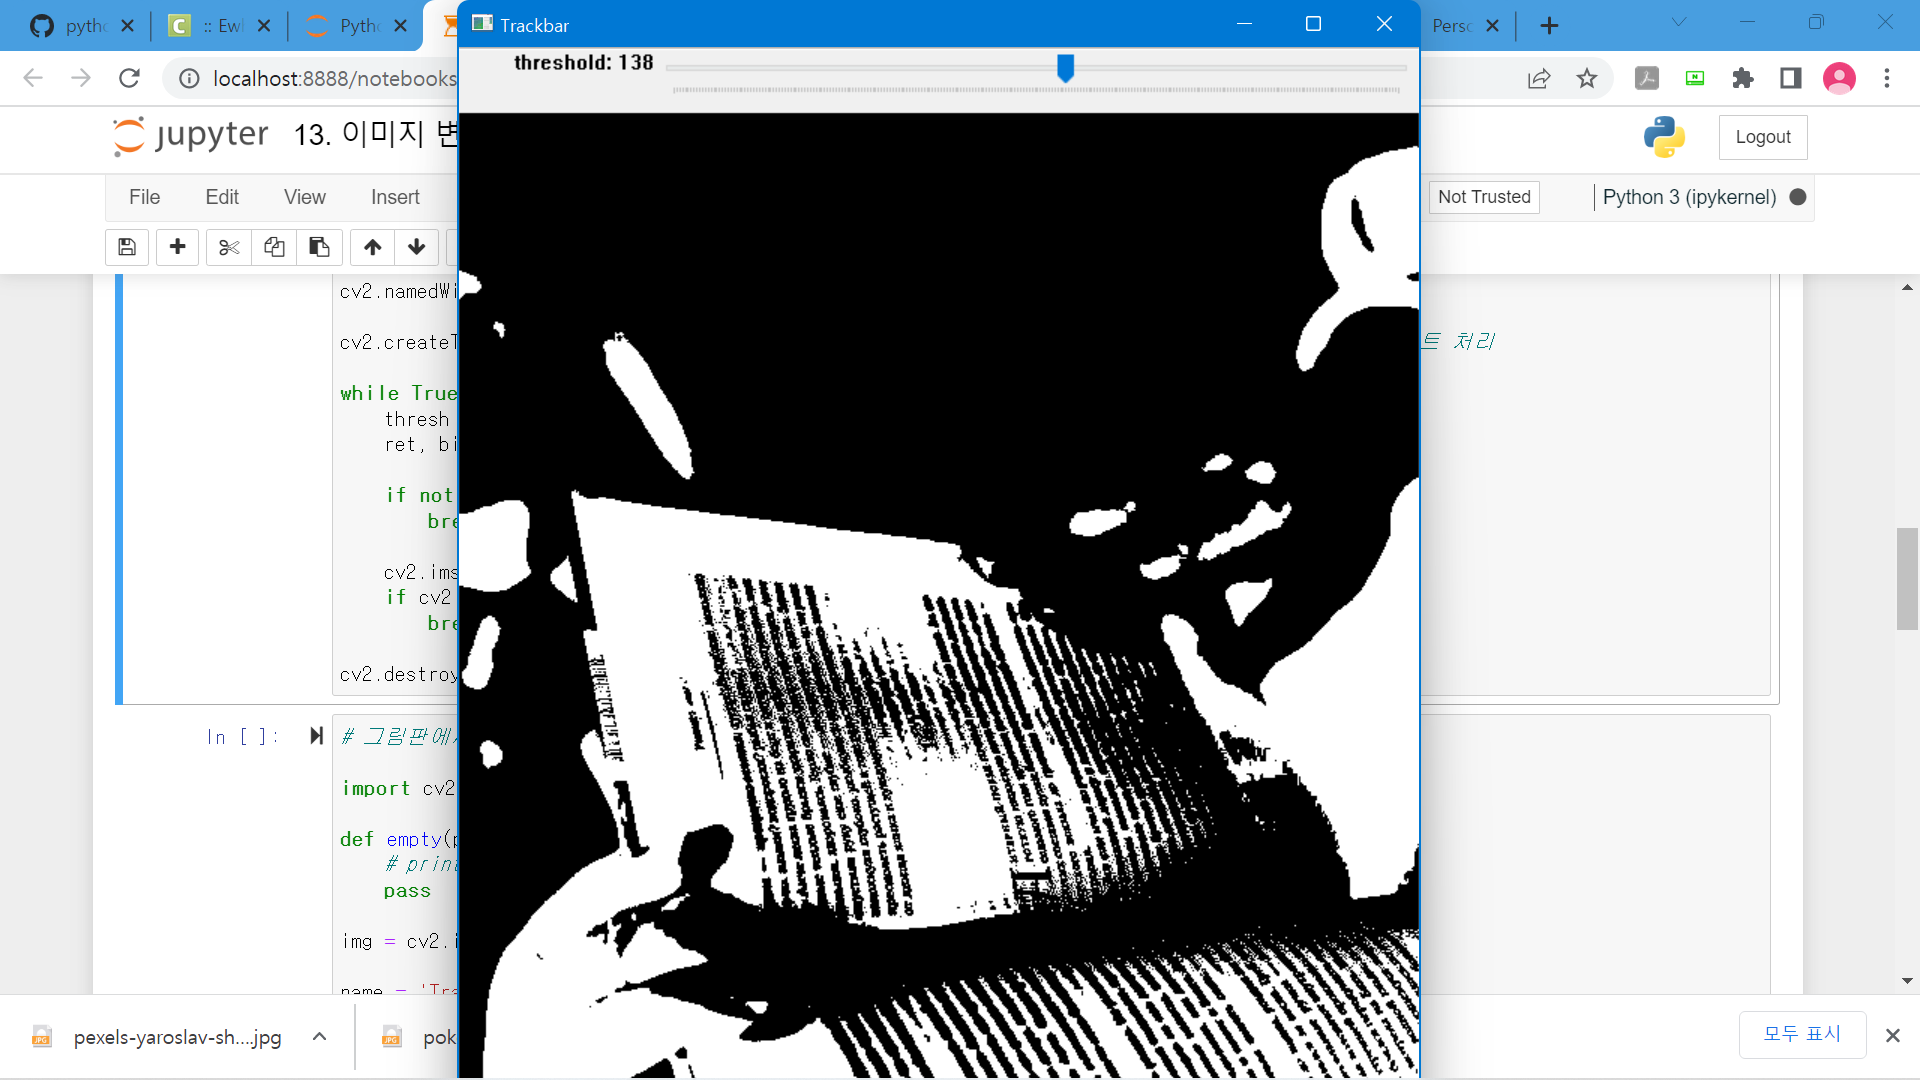

In [12]:
# 그림판에서 제작한 이미지로 확인

import cv2

def empty(pos):
    # print(pos)
    pass

img = cv2.imread('threshold.png', cv2.IMREAD_GRAYSCALE)

name = 'Trackbar'
cv2.namedWindow(name)

cv2.createTrackbar('threshold', name, 127, 255, empty) # bar 이름, 창의 이름, 초기값, 최대값, 이벤트 처리

while True:
    thresh = cv2.getTrackbarPos('threshold', name) # bar 이름, 창의 이름
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    
    if not ret:
        break
        
    cv2.imshow('img', img)
    cv2.imshow(name, binary)
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

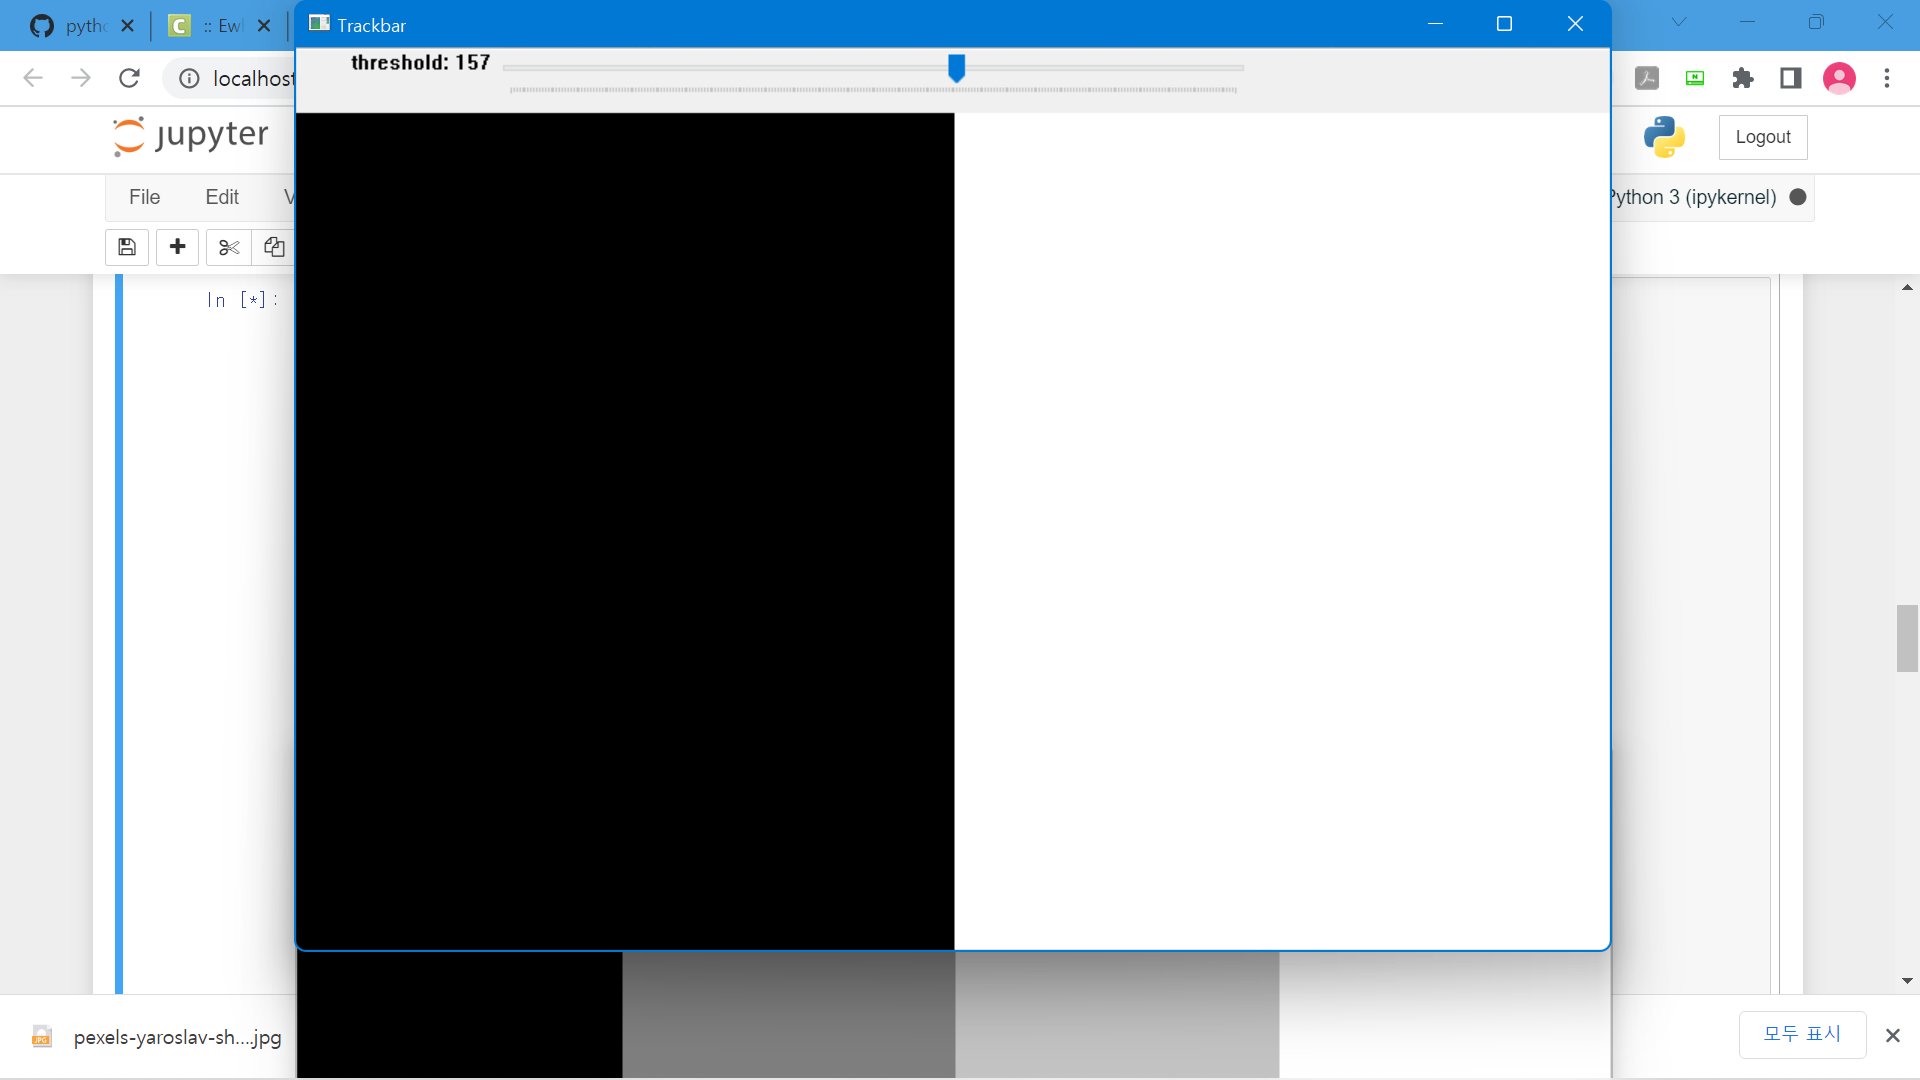

In [13]:
import cv2
img = cv2.imread('threshold.png', cv2.IMREAD_GRAYSCALE)

ret, binary1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY) # 진한 회색, 밝은 회색, 흰색
ret, binary2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # 밝은 회색, 흰색
ret, binary3 = cv2.threshold(img, 195, 255, cv2.THRESH_BINARY) # 흰색

cv2.imshow('img', img)
cv2.imshow('binary1', binary1)
cv2.imshow('binary2', binary2)
cv2.imshow('binary3', binary3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# Adaptive Threshold
# 이미지를 작은 영역으로 나누어서 임계치 적용

import cv2

def empty(pos):
    # print(pos)
    pass

img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

name = 'Trackbar'
cv2.namedWindow(name)

 # bar 이름, 창의 이름, 초기값, 최대값, 이벤트 처리
cv2.createTrackbar('block_size', name, 25, 100, empty) # 홀수만 가능, 1보다는 큰 값
cv2.createTrackbar('c', name, 3, 10, empty) # 일반적으로 양수의 값을 사용

while True:
    block_size = cv2.getTrackbarPos('block_size', name) # bar 이름, 창의 이름
    c = cv2.getTrackbarPos('c', name)
    
    if block_size <= 1: # 1 이하면 3 으로
        block_size = 3
        
    if block_size % 2 == 0: # 짝수이면 홀수로
        block_size += 1
    
    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)
    
    cv2.imshow(name, binary)
    if cv2.waitKey(1) == ord('q'):
        break
        
cv2.destroyAllWindows()

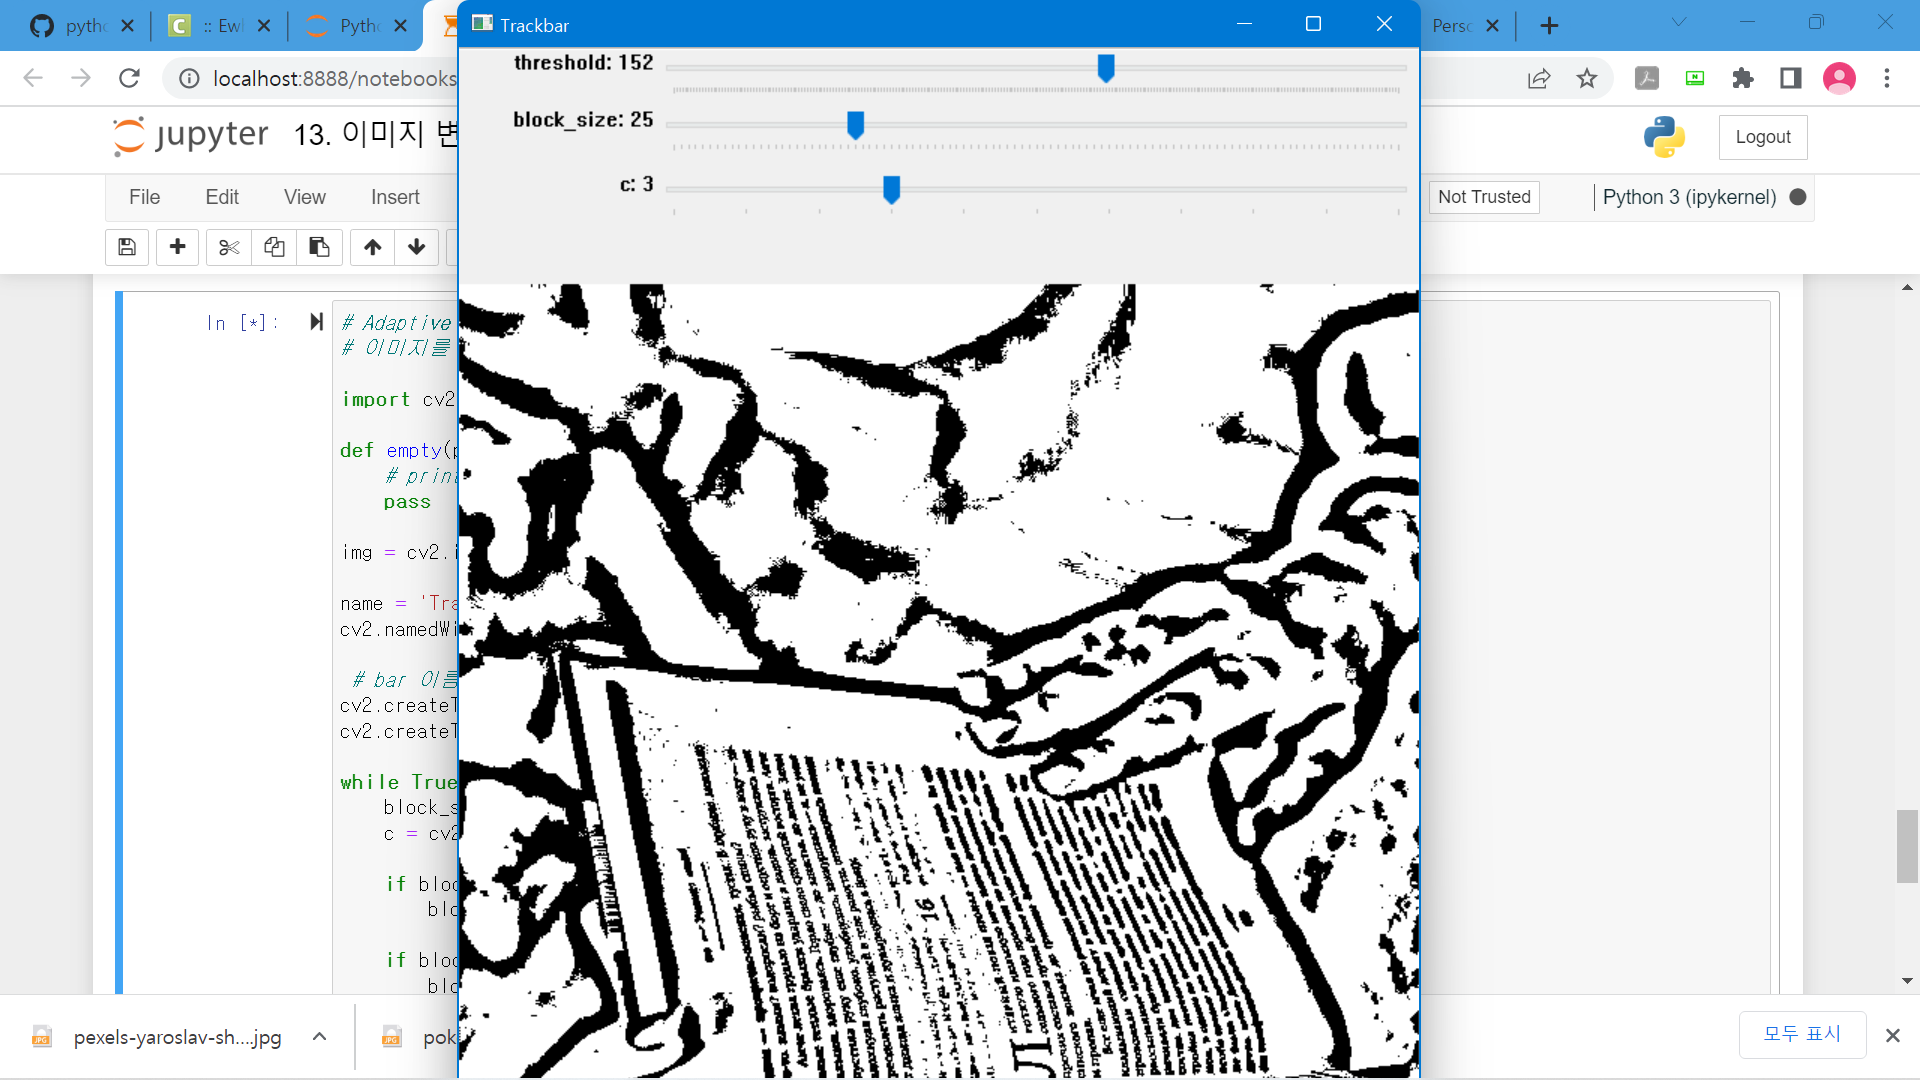

In [16]:
# 오츠 알고리즘
# Bimodal Image 에 사용하기 적합 (최적의 임계치를 자동으로 발견)

import cv2
img = cv2.imread('book.jpg', cv2.IMREAD_GRAYSCALE)

ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold ', ret)

cv2.imshow('img', img)
cv2.imshow('binary', binary)
cv2.imshow('otsu', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

otsu threshold  106.0


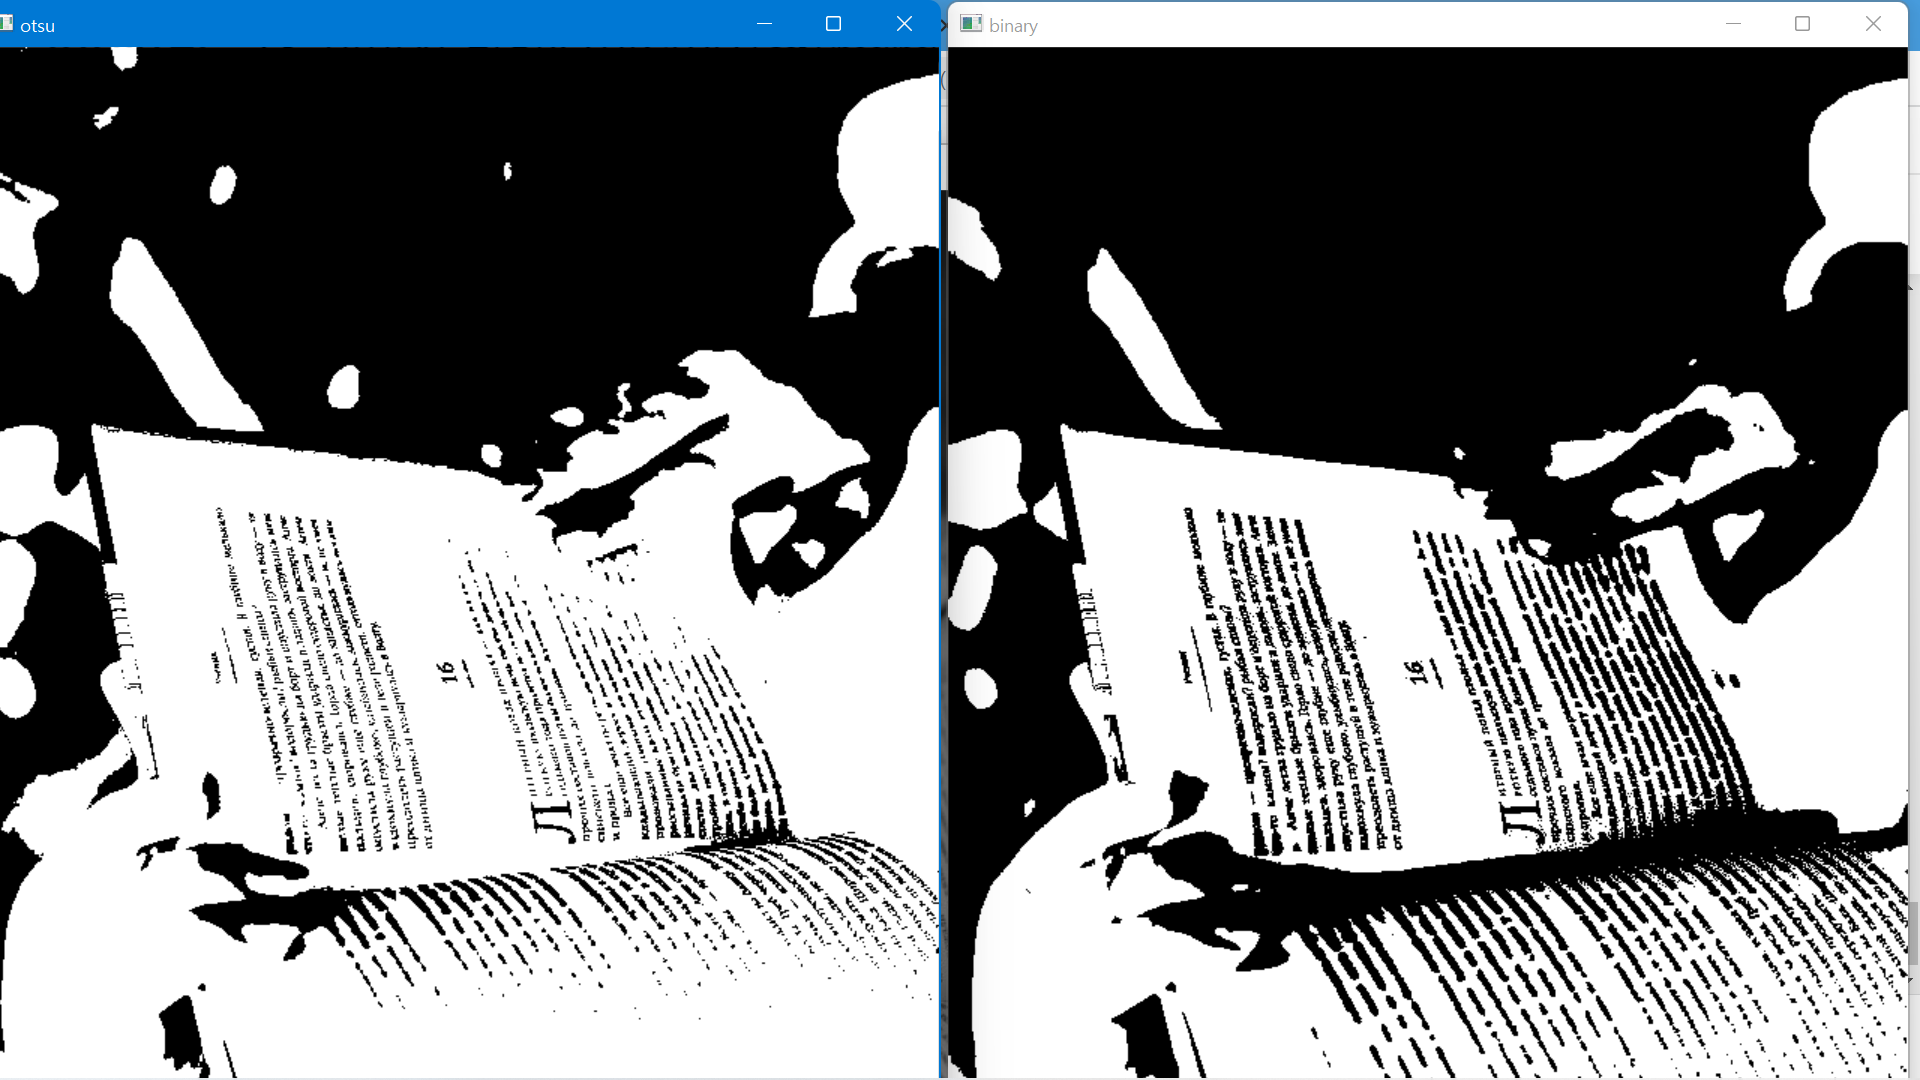